---
<h1 style="text-align: center;">Análise Estatística dos Retornos Diários do Índice Ibovespa:</h1>
<h2 style="text-align: center;">Comparação entre Distribuições Normal e t de Student</h2>

*Discente:*

    *   Gabriel D'assumpção de Carvalho

*Data:* 19/08/2024

---
---

# Introdução

As doenças cardiovasculares continuam sendo a principal causa de morte no Brasil, conforme evidenciado pelo estudo Global Burden of Disease (GBD) de 2019 e pelos dados do Sistema Único de Saúde (SUS). O aumento preocupante de ataques cardíacos entre jovens e adultos é impulsionado pela falta de atividade física e por uma dieta inadequada. Este cenário destaca a necessidade urgente de promover hábitos de vida mais saudáveis, em linha com a recomendação de Michael Pollan: "descasque mais, desembale menos", que incentiva o consumo de alimentos frescos em vez de processados.

A deterioração da saúde pública tem levado a um crescimento significativo no setor de planos de saúde. Segundo a Agência Nacional de Saúde Suplementar (ANS), o Brasil registrou um aumento de aproximadamente 20,5 milhões de novos beneficiários de planos de assistência médica entre março de 2000 e junho de 2024.

<p align="center">
  <span style="font-size: smaller;">Gráfico 01</span>
</p>
<p align="center">
  <img src="beneficiario_ans.png" alt="alt text">
</p>

O gráfico acima ilustra o crescimento dos beneficiários ao longo de 24 anos, refletindo a crescente demanda por cuidados médicos. Este aumento torna fundamental a análise e previsão das despesas associadas aos seguros de saúde, que é o objetivo central deste projeto.

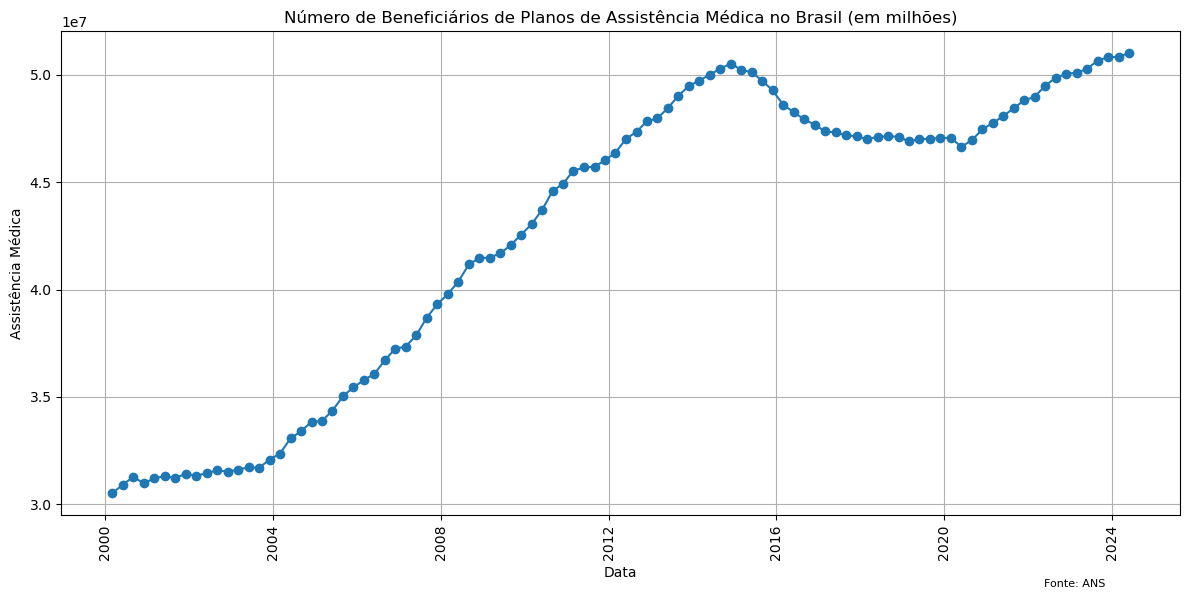

In [48]:
ans = pd.read_csv("beneficiarios_ans.csv", sep=',')
ans['data'] = pd.to_datetime(ans['data'], format='%Y-%m')

# Plotar o gráfico de linhas
plt.figure(figsize=(12, 6))
plt.plot(ans['data'], ans['Assistência Médica'], marker='o')
plt.title('Número de Beneficiários de Planos de Assistência Médica no Brasil (em milhões)')
plt.xlabel('Data')
plt.ylabel('Assistência Médica')
plt.grid(True)
plt.xticks(rotation=90)
plt.tight_layout()
plt.figtext(0.90, 0.01, 'Fonte: ANS', horizontalalignment='center', verticalalignment='bottom', fontsize=8, color='black')

plt.savefig('beneficiario_ans.png')

plt.show()



Este crescimento reflete a crescente demanda por cuidados médicos, tornando crucial a análise e previsão das despesas associadas aos seguros de saúde, que é o foco deste projeto de aprendizado de máquina.

## Bibliotecas Utilizadas

In [1]:
# Configurando o modo de exibição do pandas
import pandas as pd
pd.options.display.float_format = "{:.4f}".format

import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Desativa todos os avisos
import warnings
warnings.filterwarnings("ignore")

2024-08-21 16:59:54.908238: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Coleta dos Dados

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/gabrieldadcarvalho/neural_network/main/projeto/heart.csv")

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [3]:
len(X)

303

# Exploração dos Dados

A exploração dos dados visa identificar padrões, tendências e anomalias que podem impactar a análise. Outliers são identificados e avaliados quanto à sua significância, enquanto correlações entre variáveis são analisadas para identificar relações importantes. A análise de variáveis categóricas inclui a avaliação das frequências e modas, e visualizações adicionais, como heatmaps e pair plots, são utilizadas para suportar a análise e identificar padrões mais complexos.

In [12]:
# Verificando as 5 primeiras linhas de x
print(X.head())

   age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0   2.3000    0   
1   37    1   2     130   250    0        1       187     0   3.5000    0   
2   41    0   1     130   204    0        0       172     0   1.4000    2   
3   56    1   1     120   236    0        1       178     0   0.8000    2   
4   57    0   0     120   354    0        1       163     1   0.6000    2   

   caa  thall  
0    0      1  
1    0      2  
2    0      2  
3    0      2  
4    0      2  


In [13]:
# Verificando as 5 primeiras linhas de x
print(y.head())

0    1
1    1
2    1
3    1
4    1
Name: output, dtype: int64


## Variáveis Explicativas
Vamos realizar uma análise exploratória das variáveis explicativas do conjunto de dados. Abaixo estão as estatísticas descritivas e visualizações para cada variável.

### Idade

In [15]:
X['age'].describe()

count   303.0000
mean     54.3663
std       9.0821
min      29.0000
25%      47.5000
50%      55.0000
75%      61.0000
max      77.0000
Name: age, dtype: float64

In [16]:
X['age'].mode()

0    58
Name: age, dtype: int64

Ao visualizar as estatisticas da variável idade, podemos perceber que